# Russell Data CLeaning and EDA

## Imports and Helper functions

In [1]:
from warnings import simplefilter
simplefilter(action='ignore')

from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import pandas as pd
import numpy as np
import sympy as sympy
import time 
import enum

In [2]:
#Clean method to return all the image IDs of a given patient ID
def returnAllPatientImages(patient):
    return(list(train_data[train_data["PatientID"]==patient]["StudyInstanceUID"]))

## Data Cleanining and Integrity Checking

In [3]:
train_data = pd.read_csv("train - train.csv")
train_data

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
0,1.2.826.0.1.3680043.8.498.26697628953273228189...,0,0,0,0,0,0,1,0,0,0,0,ec89415d1
1,1.2.826.0.1.3680043.8.498.46302891597398758759...,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c
2,1.2.826.0.1.3680043.8.498.23819260719748494858...,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5
3,1.2.826.0.1.3680043.8.498.68286643202323212801...,0,0,0,0,0,0,0,1,0,0,0,c31019814
4,1.2.826.0.1.3680043.8.498.10050203009225938259...,0,0,0,0,0,0,0,0,0,1,0,207685cd1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30078,1.2.826.0.1.3680043.8.498.74257566841157531124...,0,0,1,0,0,0,0,0,1,1,0,5b5b9ac30
30079,1.2.826.0.1.3680043.8.498.46510939987173529969...,0,0,0,0,0,0,0,0,0,1,0,7192404d8
30080,1.2.826.0.1.3680043.8.498.43173270582850645437...,0,0,1,0,0,1,0,1,0,1,0,d4d1b066d
30081,1.2.826.0.1.3680043.8.498.95092491950130838685...,0,0,0,0,0,0,0,0,1,0,0,01a6602b8


In [4]:
train_data.isna().sum()

StudyInstanceUID              0
ETT - Abnormal                0
ETT - Borderline              0
ETT - Normal                  0
NGT - Abnormal                0
NGT - Borderline              0
NGT - Incompletely Imaged     0
NGT - Normal                  0
CVC - Abnormal                0
CVC - Borderline              0
CVC - Normal                  0
Swan Ganz Catheter Present    0
PatientID                     0
dtype: int64

In [5]:
train_data["PatientID"].describe()

count         30083
unique         3255
top       05029c63a
freq            172
Name: PatientID, dtype: object

In [6]:
len(train_data["StudyInstanceUID"].unique())

30083

## EDA

In [7]:
#Counts the number of patients
train_data["PatientID"].unique().size

3255

Despite there being about 30,000 rows in the table, there are only about 3255 patients. This means that paints will the multiple images of them with varying data points. There are ~9 images per patitent. Lets look further into this.

In [8]:
#Groups the table to log the number of occurrences of each patient
frequencies = pd.DataFrame(train_data.groupby(by="PatientID")["PatientID"].count())
frequencies.rename(columns={"PatientID":"Count"}, inplace=True)

In [9]:
display(frequencies.sort_values(by="Count", ascending=False))
singleImagePatients = frequencies[frequencies["Count"]==1]
mt10ImagePatients = frequencies[frequencies["Count"]>10]
print(f"{singleImagePatients.size} patients have only 1 image")
print(f"{mt10ImagePatients.size} patients have more than 10 images")

,Count
PatientID,
05029c63a,172
55073fece,167
26da0d5ad,148
8849382d0,130
34242119f,110
...,...
c09883b19,1
e46763e02,1
7bcec67b1,1


397 patients have only 1 image
800 patients have more than 10 images


Text(0, 0.5, 'Patients with X no. of chest images')

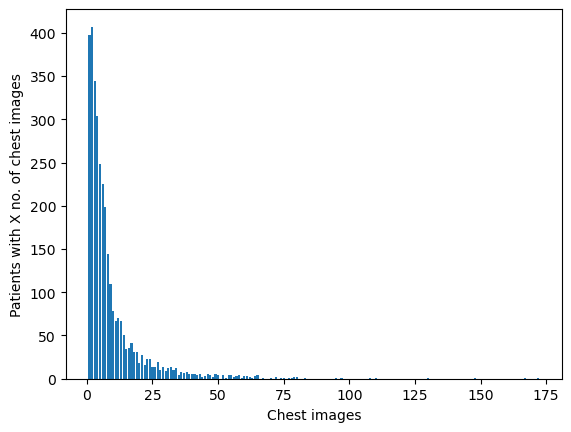

In [10]:
counts = frequencies["Count"].value_counts().sort_index() #Value counts () function suggested by ChatGPT
plt.bar(counts.index, counts.values)
plt.xlabel("Chest images")
plt.ylabel("Patients with X no. of chest images")

Seems very exponential. The mode number of chest images is 2 for all patients and there are a few outliers way past 50 images for one patient. <br>
Knowing this, let's take a look at the patient with the most entries to see if we can root out any stories or patters. How might these catherters change over time in a single patient?

In [11]:
mostImagedPatient = train_data[train_data["PatientID"]=="05029c63a"]
dataToDisplay = mostImagedPatient.sort_values(by= "ETT - Normal")

#Bypasses maximum row limit
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(dataToDisplay)

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
2226,1.2.826.0.1.3680043.8.498.74190045333565570017...,0,1,0,0,0,0,1,0,0,1,1,05029c63a
12933,1.2.826.0.1.3680043.8.498.61936035308630680796...,0,1,0,0,0,0,0,0,1,0,0,05029c63a
28334,1.2.826.0.1.3680043.8.498.83695501915139952540...,0,1,0,0,0,1,0,0,1,1,0,05029c63a
24390,1.2.826.0.1.3680043.8.498.42565923266899815850...,0,1,0,0,0,0,1,0,1,1,1,05029c63a
10367,1.2.826.0.1.3680043.8.498.89784585798061898325...,0,1,0,0,0,0,1,0,0,1,1,05029c63a
14245,1.2.826.0.1.3680043.8.498.93518520610058188214...,0,0,0,0,0,0,1,0,0,0,0,05029c63a
10253,1.2.826.0.1.3680043.8.498.81612968658469626927...,0,0,0,0,0,0,0,0,0,1,1,05029c63a
27011,1.2.826.0.1.3680043.8.498.14612428778012016836...,0,1,0,0,0,1,0,0,0,1,1,05029c63a
17329,1.2.826.0.1.3680043.8.498.51595082650400612709...,0,0,0,0,0,0,0,0,0,1,1,05029c63a
4828,1.2.826.0.1.3680043.8.498.74338185865293989379...,0,1,0,0,0,0,1,0,0,1,0,05029c63a


In [12]:
#This is to analyse a list of all the images of the most-imaged patient
returnAllPatientImages("05029c63a")

['1.2.826.0.1.3680043.8.498.33289872132944517059685300521052847970',
 '1.2.826.0.1.3680043.8.498.58815494070381425972841494897309562888',
 '1.2.826.0.1.3680043.8.498.18423562395321282202151467283211883687',
 '1.2.826.0.1.3680043.8.498.80010847260848855758249955549927520930',
 '1.2.826.0.1.3680043.8.498.68620140014200110095088585785330951729',
 '1.2.826.0.1.3680043.8.498.87375315768078677164756022968175911741',
 '1.2.826.0.1.3680043.8.498.99564257536158506118998101216918000997',
 '1.2.826.0.1.3680043.8.498.43908356782442779725424825386043768718',
 '1.2.826.0.1.3680043.8.498.51991674554454729241003433645598796537',
 '1.2.826.0.1.3680043.8.498.78021892236561877580290458242105043659',
 '1.2.826.0.1.3680043.8.498.86537162817021158811092283918656005072',
 '1.2.826.0.1.3680043.8.498.11525667914743618624335995337909956877',
 '1.2.826.0.1.3680043.8.498.12682264367523788590209252628203092871',
 '1.2.826.0.1.3680043.8.498.74190045333565570017428818377245264093',
 '1.2.826.0.1.3680043.8.498.294983

Let's look at a simple patient, maybe just one in a middle with only 7 images (01a6602b8)

In [13]:
mostImagedPatient = train_data[train_data["PatientID"]=="01a6602b8"]
dataToDisplay = mostImagedPatient

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(dataToDisplay)

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
3547,1.2.826.0.1.3680043.8.498.13368586175752823546...,0,0,0,0,0,0,0,0,0,1,0,01a6602b8
3834,1.2.826.0.1.3680043.8.498.92443648275106206350...,0,0,0,0,0,0,0,0,0,1,0,01a6602b8
18199,1.2.826.0.1.3680043.8.498.48575077712160297418...,0,0,0,0,0,0,0,0,1,0,0,01a6602b8
20679,1.2.826.0.1.3680043.8.498.38434326028461648396...,0,0,0,0,0,0,0,0,0,1,0,01a6602b8
22063,1.2.826.0.1.3680043.8.498.32265506210757468088...,0,0,0,0,0,0,0,0,0,1,0,01a6602b8
22775,1.2.826.0.1.3680043.8.498.70674394161629430460...,0,0,0,0,0,0,0,0,0,1,0,01a6602b8
30081,1.2.826.0.1.3680043.8.498.95092491950130838685...,0,0,0,0,0,0,0,0,1,0,0,01a6602b8


In [14]:
frequencies[frequencies["Count"]==7].head(3)

,Count
PatientID,
01a6602b8,7
01e3dc988,7
01fa2ad89,7


In [15]:
mostImagedPatient = train_data[train_data["PatientID"]=="ff826cf51"]
dataToDisplay = mostImagedPatient

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(dataToDisplay)

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
9054,1.2.826.0.1.3680043.8.498.85888286754526046422...,0,0,0,0,0,0,0,0,0,1,0,ff826cf51
16211,1.2.826.0.1.3680043.8.498.50804831665099230965...,0,0,0,0,0,0,0,0,0,1,0,ff826cf51
17344,1.2.826.0.1.3680043.8.498.29983487174552869646...,0,0,1,0,0,1,0,0,0,1,0,ff826cf51
17658,1.2.826.0.1.3680043.8.498.73750776498365697385...,0,0,1,0,0,0,1,0,0,1,0,ff826cf51
18146,1.2.826.0.1.3680043.8.498.12722241245555310535...,0,0,1,0,0,0,1,0,0,1,0,ff826cf51
20747,1.2.826.0.1.3680043.8.498.65803857161092450324...,0,0,1,0,0,1,0,0,0,1,0,ff826cf51
25717,1.2.826.0.1.3680043.8.498.12724690186666099182...,0,0,0,0,0,0,0,0,1,0,0,ff826cf51


After taking a peek at some of the patients with only a few images, it can be seen that most images are focused on CVC caherters. Additionally, the CVC catherters seem to bounce back and forth a lot betwtween normal and bordeline and sometimes abnormal. There are two possible conjectures, since there is no record of time between these photos: <br><br>
1] The catherters move about and can change betwwen normal and borerline between images <br>
2] Chaterters start borderline or normal until an event or action which displaces them into another state, in which they stay until disturbed agian. 

Now let's take a look at how the different catherters are distributed and how we might set up lachine learning, knowing our distribution. The first goal of machine learning is to identify which catherters are present. Because oif such, it is nice and helpful to know which one is out most populous, so we have an idea of which one to train first. The same will be done for all tube configurations and the two graphs will be analysed separately.

In [16]:
#We set the chaterter "Present" column to true (1) if a catherter of that type in any state is recorded at all
train_data["ETT - Present"] = train_data[["ETT - Abnormal", "ETT - Borderline", "ETT - Normal"]].sum(axis=1).clip(upper=1) #Clip use suggested by Chat GPT
train_data["NGT - Present"] = train_data[["NGT - Incompletely Imaged", "NGT - Abnormal", "NGT - Borderline", "NGT - Normal"]].sum(axis=1).clip(upper=1)
train_data["CVC - Present"] = train_data[["CVC - Abnormal", "CVC - Borderline", "CVC - Normal"]].sum(axis=1).clip(upper=1)
train_data["Abnormal configuration"] = train_data[["ETT - Abnormal", "NGT - Abnormal", "CVC - Abnormal"]].sum(axis=1).clip(upper=1) #Clip use suggested by Chat GPT
train_data["Borderline configuration"] = train_data[["ETT - Borderline", "NGT - Borderline", "CVC - Borderline"]].sum(axis=1).clip(upper=1)
train_data["Normal configuration"] = train_data[["ETT - Normal", "NGT - Normal", "CVC - Normal"]].sum(axis=1).clip(upper=1)
train_data["Incompletely imaged"] = train_data["NGT - Incompletely Imaged"]
train_data.sample(5)

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID,ETT - Present,NGT - Present,CVC - Present,Abnormal configuration,Borderline configuration,Normal configuration,Incompletely imaged
12557,1.2.826.0.1.3680043.8.498.11835188982594484475...,0,0,0,0,0,0,0,0,0,1,0,da76d8561,0,0,1,0,0,1,0
15413,1.2.826.0.1.3680043.8.498.90953691672803055403...,0,0,1,0,0,1,0,0,0,1,0,6946eb422,1,1,1,0,0,1,1
22199,1.2.826.0.1.3680043.8.498.93433183697981492004...,0,0,0,0,0,0,0,0,0,1,0,ca89435d3,0,0,1,0,0,1,0
24127,1.2.826.0.1.3680043.8.498.12060958632438754721...,0,0,0,0,0,0,1,0,0,1,0,4d8319aa3,0,1,1,0,0,1,0
15445,1.2.826.0.1.3680043.8.498.50503953632651922390...,0,0,0,0,0,0,0,0,0,1,0,7ba3db267,0,0,1,0,0,1,0


830


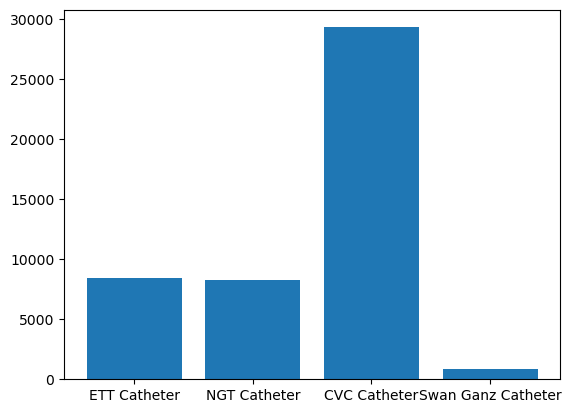

In [17]:
catherter_type = train_data[["StudyInstanceUID", "ETT - Present", "NGT - Present", "CVC - Present", "Swan Ganz Catheter Present"]]
ETTCat = catherter_type[catherter_type["ETT - Present"]==1]["ETT - Present"].count()
NGTCat = catherter_type[catherter_type["NGT - Present"]==1]["NGT - Present"].count()
CVCCat = catherter_type[catherter_type["CVC - Present"]==1]["CVC - Present"].count()
SGCat = catherter_type[catherter_type["Swan Ganz Catheter Present"]==1]["Swan Ganz Catheter Present"].count()

plt.bar(["ETT Catheter", "NGT Catheter", "CVC Catheter", "Swan Ganz Catheter"], [ETTCat, NGTCat, CVCCat, SGCat])
print(SGCat)

3515

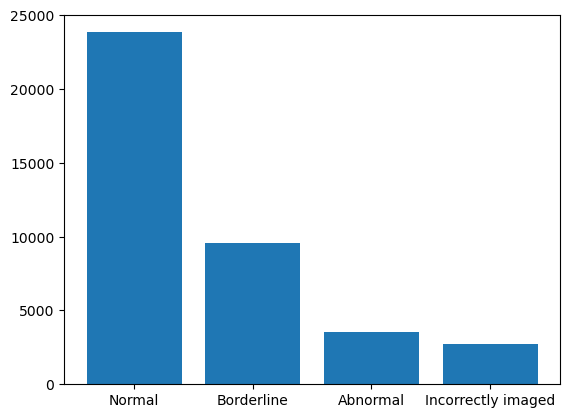

In [18]:
catherter_type = train_data[["StudyInstanceUID", "Normal configuration", "Borderline configuration", "Abnormal configuration", "Incompletely imaged"]]
normal = catherter_type[catherter_type["Normal configuration"]==1]["Normal configuration"].count()
borderline = catherter_type[catherter_type["Borderline configuration"]==1]["Borderline configuration"].count()
abnormal = catherter_type[catherter_type["Abnormal configuration"]==1]["Abnormal configuration"].count()
incorrectlyImaged = catherter_type[catherter_type["Incompletely imaged"]==1]["Incompletely imaged"].count()

plt.bar(["Normal", "Borderline", "Abnormal", "Incorrectly imaged"], [normal, borderline, abnormal, incorrectlyImaged])
abnormal

From the above, it is very clear that the CVC catherter is the catherter with the most images attached to it. This catherter should be targeted first. Looking further to the graph of only configurations, it is clear that Normal catherters are the dominant type. This does not necessceraily mean that Normal CVC catherters are the most frequent type. Further investigation is needed to confirm that.<br>
One clear conclusion can be drawn, however, that the data spread of catherter types are very unbalanced. Since borderline catherter distinction is outside the initial scope of the study, borderline catherters can be treated as synonymous to abnormal catherters and the data balance will increase. <br> <br>
There, however, is an interesting conjecture that can be posed to this data. Does the fact that we have images of the same patient skew our data? To test this, we can crete a subset of the main testing data where there is only one image per patient. When taking the distribution of types using this data, if the distribuion changes largely, the hypothesis is proven true, and further action can be taken to reduce the bias caused by some outlier patients.  

In [19]:
data_all_duplicates = train_data.copy() 
data_no_duplicates_keep_first = train_data.drop_duplicates(subset=["PatientID"], keep='first')
data_no_duplicates_keep_last = train_data.drop_duplicates(subset=["PatientID"], keep='last')

In [27]:
#Helper function to graph the distribution of Catherter types of multiple graphs
#Input two lists, datasets [dataframe], names [string], lists need to be same length
def chart_types(datasets: list, names: list):
    if len(datasets) != len(names):
        raise(AttributeError, "List lengths do not match, list of datasets and list of names do not match")
    
    fig, axes = plt.subplots(1, len(datasets), figsize=(5*len(datasets), 5))  # 1 row, N columns
    if len(datasets) == 1:
        axes = [axes]  # make iterable if only one plot

    #Instantiate the values for each category we want to check
    for i in range(len(datasets)):
        catherter_type = datasets[i][["StudyInstanceUID", "ETT - Present", "NGT - Present", "CVC - Present", "Swan Ganz Catheter Present"]]
        ETTCat = catherter_type[catherter_type["ETT - Present"]==1]["ETT - Present"].count()
        NGTCat = catherter_type[catherter_type["NGT - Present"]==1]["NGT - Present"].count()
        CVCCat = catherter_type[catherter_type["CVC - Present"]==1]["CVC - Present"].count()
        SGCat = catherter_type[catherter_type["Swan Ganz Catheter Present"]==1]["Swan Ganz Catheter Present"].count()
        total = catherter_type["StudyInstanceUID"].count()

        #Displaying in terms of proprtions
        ETTProp = ETTCat/total
        NGTProp = NGTCat/total
        CVCProp = CVCCat/total
        SGProp = SGCat/total

        #Graphing the output in a bar graph
        axes[i].bar(["ETT Catheter", "NGT Catheter", "CVC Catheter", "S.Ganz Catheter"], [ETTProp, NGTProp, CVCProp, SGProp])
        axes[i].set_title(names[i])
        axes[i].set_xlabel("Caterther type")
        axes[i].set_ylabel("Caterther proportion")

    plt.tight_layout()
    plt.show()

In [28]:
#Helper function to graph the distribution of Catherter configuration of multiple graphs
#Input two lists, datasets [dataframe], names [string], lists need to be same length
def chart_configurations(datasets: list, names: list):
    if len(datasets) != len(names):
        raise(AttributeError, "List lengths do not match, list of datasets and list of names do not match")
    
    fig, axes = plt.subplots(1, len(datasets), figsize=(5*len(datasets), 5))  # 1 row, N columns
    if len(datasets) == 1:
        axes = [axes]  # make iterable if only one plot
    
    for i in range(len(datasets)):
        catherter_type = datasets[i][["StudyInstanceUID", "Normal configuration", "Borderline configuration", "Abnormal configuration", "Incompletely imaged"]]
        normal = catherter_type[catherter_type["Normal configuration"]==1]["Normal configuration"].count()
        borderline = catherter_type[catherter_type["Borderline configuration"]==1]["Borderline configuration"].count()
        abnormal = catherter_type[catherter_type["Abnormal configuration"]==1]["Abnormal configuration"].count()
        incorrectlyImaged = catherter_type[catherter_type["Incompletely imaged"]==1]["Incompletely imaged"].count()

        total = catherter_type["StudyInstanceUID"].count()

        #Displaying in terms of proprtions
        normalProp = normal/total
        borderlineProp = borderline/total
        abnormalProp = abnormal/total
        incorrectlyImagedProp = incorrectlyImaged/total

        axes[i].bar(["Normal", "Borderline", "Abnormal", "I. Imaged"], [normalProp, borderlineProp, abnormalProp, incorrectlyImagedProp])
        axes[i].set_title(names[i])
        axes[i].set_xlabel("Caterther configuration")
        axes[i].set_ylabel("Caterther proportion")

    plt.tight_layout()
    plt.show()

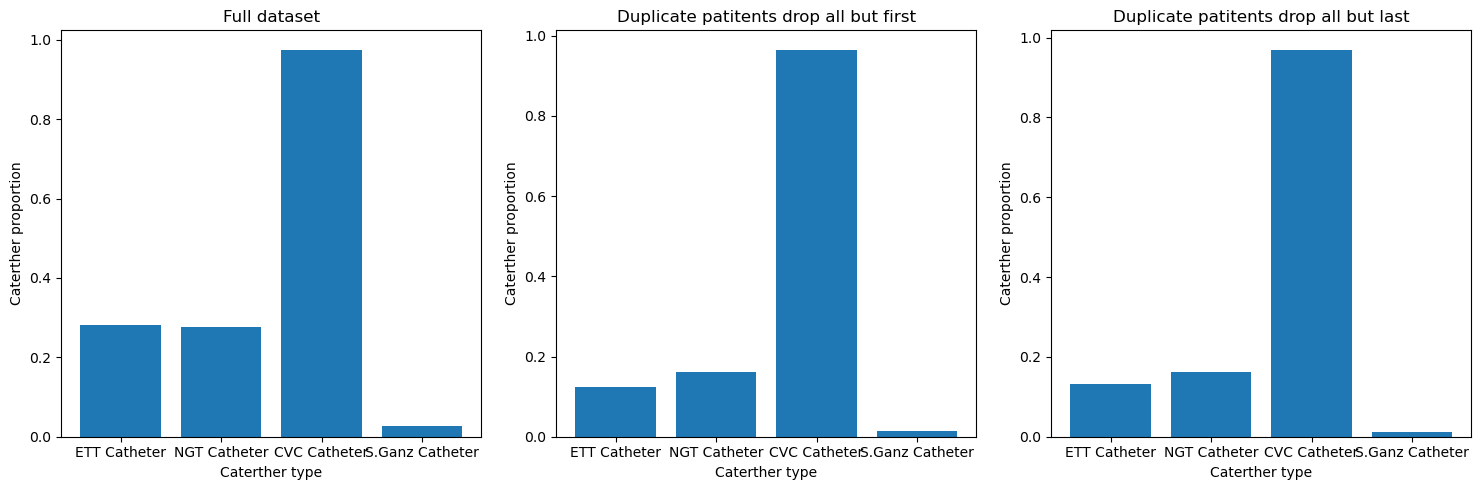

3515
379
375


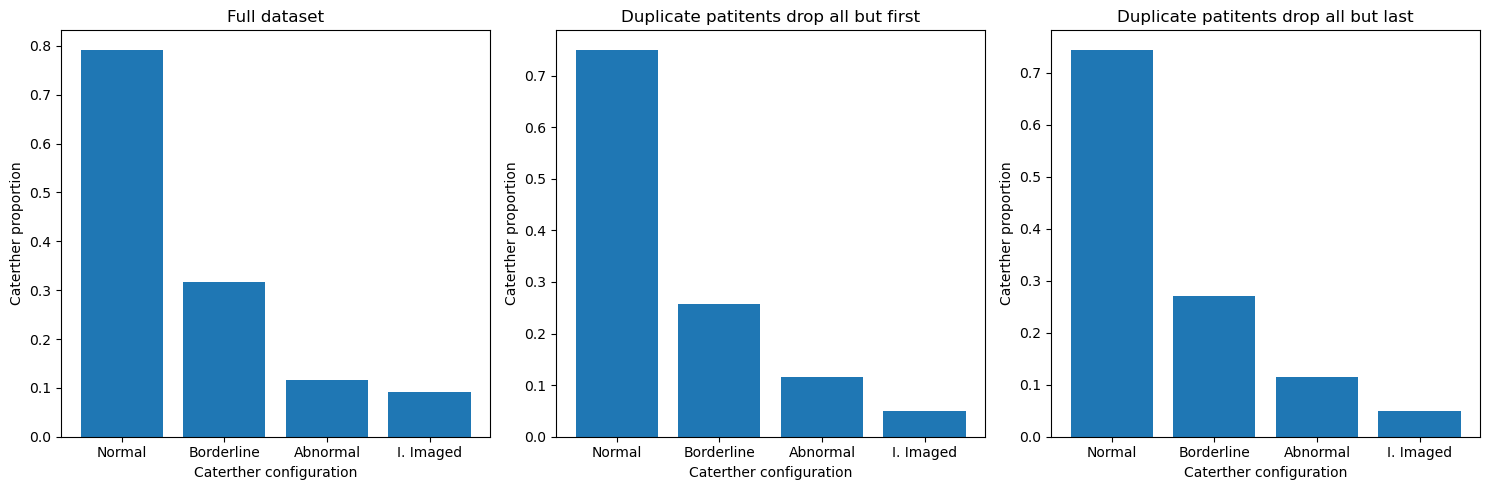

In [22]:
chart_types([data_all_duplicates, data_no_duplicates_keep_first, data_no_duplicates_keep_last],
            ["Full dataset", "Duplicate patitents drop all but first", "Duplicate patitents drop all but last"])
chart_configurations([data_all_duplicates, data_no_duplicates_keep_first, data_no_duplicates_keep_last],
            ["Full dataset", "Duplicate patitents drop all but first", "Duplicate patitents drop all but last"])

The above figures unearth a pretty clear association in the catherther type of duplicate paitients. When duplicates were dropped, the porportion of ETT and NGT catherters went down considerably, Along with a small decrease in Swan Ganz caterthers. At the same time, the Propertion of CVC caterthers stayed relatively the same. This can imply a few things. Firstly, it reveals that catherters that are not CVC catherters are more dominant among duplicated images. More importantly, it alludes that the model will be trained on a distribution of caterter types that differs from a per-patient distribution. This should not affect the perfoemance of the model, but can have implications on how we treat the output of the model. 
<br> <br>
On the other hand, catherter type shows that there is no bias inttroduces from the multiple patient spread, and the distribution does not change at all.